In [1]:
import torch
from core.uav_env import UAVEnv
from core.train import train_dqn
from evaluation.evaluate import evaluate_policy
from visualization.visualize import visualize_uav_positions
from evaluation.random_policy import RandomPolicyNet
import plotly.io as pio
from plotly.offline import init_notebook_mode

# Initialize Plotly to work in Jupyter notebook
init_notebook_mode(connected=True)
pio.renderers.default = 'browser'

In [2]:
from core.dqn import DQN, DuelingDQN
from evaluation.evaluate import evaluate_policy

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
print(device)

cpu


In [5]:
from configs.config import Config
config = Config("DQN")
print(config.num_episodes)

100


In [6]:
from evaluation.hyperparam_tuning import evaluate_config
print(config.num_episodes)
print(config.learning_rate)
print(config.network)

cpu
100
0.001
DQN


## DQN

c:\Users\anson\Documents\MENG\ECE1508\UAV-DRL\core\utils.py:35: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Best model saved to ./output/best_model/best_model.pth.tar
Episode 0, Total Reward: -45681.926929729234
Episode 1, Total Reward: -46101.92575551169
Best model saved to ./output/best_model/best_model.pth.tar
Episode 2, Total Reward: -44020.417223325356
Episode 3, Total Reward: -44114.91081771017
Best model saved to ./output/best_model/best_model.pth.tar
Episode 4, Total Reward: -41429.57421493936
Best model saved to ./output/best_model/best_model.pth.tar
Episode 5, Total Reward: -40831.394159619806
Best model saved to ./output/best_model/best_model.pth.tar
Episode 6, Total Reward: -36676.547938847434
Episode 7, Total Reward: -40913.81631552152
Episode 8, Total Reward: -43988.18297005621
Episode 9, Total Reward: -40886.88843771464
Episode 10, Total Reward: -37196.608193338114
Episode 11, Total Reward: -40197.7668903318
Episode 12, Total Reward: -42066.49801089646
Episode 13, Total Reward: -39536.34978507514
Episode 14, Total Reward: -42100.933179898064
Episode 15, Total Reward: -38861.37

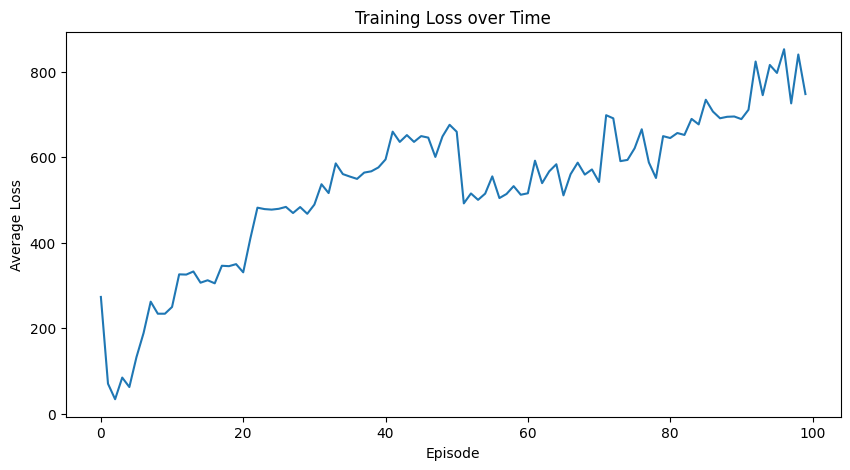

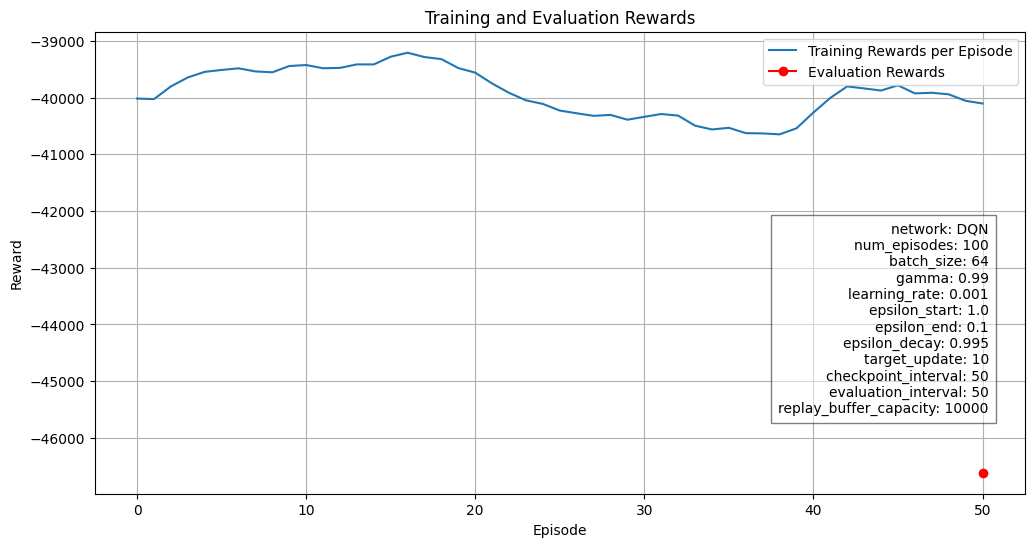

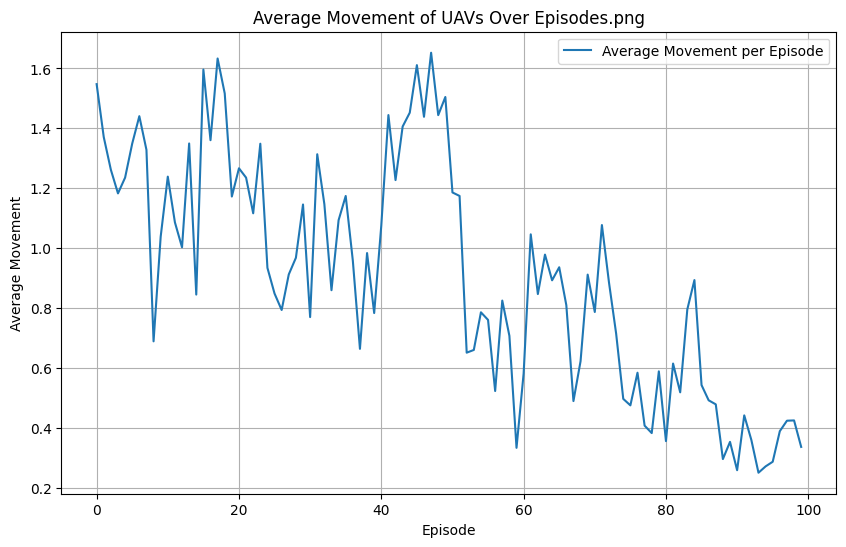

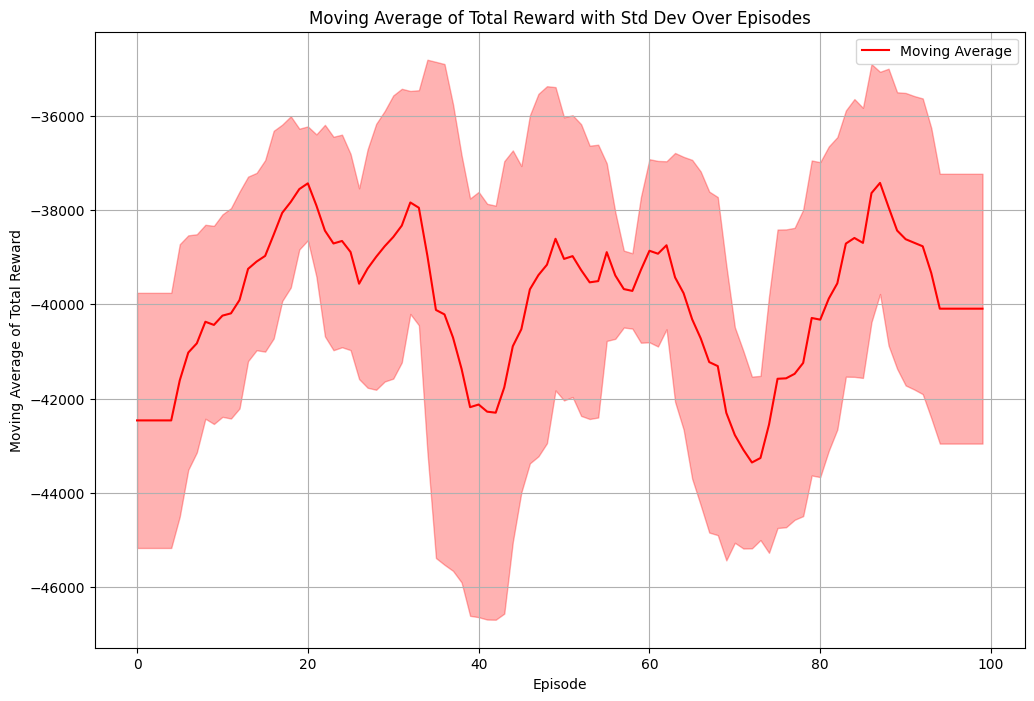

(-40060.70076121318,
 {'episode': 91,
  'policy_net_state_dict': OrderedDict([('fc1.weight',
                tensor([[ 3.2325e-02,  2.5184e-01, -3.0827e-01,  ..., -4.9851e-01,
                          6.6583e-01, -5.3747e-01],
                        [-2.0824e-01, -1.0516e-01, -4.2069e-01,  ...,  7.9402e-01,
                         -3.5051e-01, -5.1379e-01],
                        [-1.3300e-01, -5.0907e-02,  1.1069e-01,  ..., -2.3235e-01,
                          1.8859e+00,  1.9439e-01],
                        ...,
                        [-1.4182e-01,  9.3321e-02, -2.9596e-01,  ...,  3.4307e-01,
                         -1.3314e+00,  2.6459e-01],
                        [ 3.4495e-02, -5.0771e-01, -5.5592e-01,  ..., -3.0801e-01,
                         -1.4145e-01,  2.8390e-01],
                        [-4.7552e-01, -8.7076e-02, -7.5341e-04,  ...,  4.5833e-01,
                          2.1876e-01,  5.0245e-01]])),
               ('fc1.bias',
                tensor([-2.2341e-01, 

In [7]:
evaluate_config(config)

## Dueling DQN

In [ ]:
#evaluate_config(config,"DuelingDQN")

## Visualization

In [ ]:
dqn_model = torch.load('./UAV-DRL/output/best_model/best_model.pth.tar', map_location=device)
#duel_model = torch.load('./UAV-DRL/output/best_model/duel.pth.tar', map_location=device)

In [ ]:
env = UAVEnv(num_users=20, num_uavs=3, area_size=(100, 100))
state_size = env.observation_space.shape[0] * env.observation_space.shape[1]
action_size = env.action_space.n

In [ ]:
policy_net_dqn = DQN(state_size,3, action_size).to(device)
policy_net_dqn.load_state_dict(dqn_model['policy_net_state_dict'])
#policy_net_duel = DuelingDQN(state_size, action_size).to(device)
#policy_net_duel.load_state_dict(duel_model['policy_net_state_dict'])

In [ ]:
average_reward_dqn, user_positions_dqn, uav_positions_dqn = evaluate_policy(env, policy_net_dqn, num_episodes=1, device=device)

In [ ]:
#average_reward_duel, user_positions_duel, uav_positions_duel = evaluate_policy(env, policy_net_duel, num_episodes=10, device=device)

In [ ]:
visualize_uav_positions(user_positions_dqn, uav_positions_dqn)

In [ ]:
visualize_uav_positions(user_positions_duel, uav_positions_duel)

In [ ]:
import matplotlib.pyplot as plt

# Assume all_user_positions and all_uav_positions are returned from evaluate_policy
# and contain positions for each episode

def plot_final_positions(all_user_positions, all_uav_positions):
    for episode_idx, (user_positions, uav_positions) in enumerate(zip(all_user_positions, all_uav_positions)):
        if user_positions and uav_positions:  # Ensure there is data
            final_user_positions = user_positions[-1]
            final_uav_positions = uav_positions[-1]

            plt.figure(figsize=(8, 6))
            plt.scatter(final_user_positions[:, 0], final_user_positions[:, 1], c='blue', label='Users')
            plt.scatter(final_uav_positions[:, 0], final_uav_positions[:, 1], c='red', label='UAVs')
            plt.title(f'Episode {episode_idx + 1} - Final Positions')
            plt.xlabel('X Position')
            plt.ylabel('Y Position')
            plt.legend()
            plt.grid(True)
            plt.show()

plot_final_positions(user_positions_dqn, uav_positions_dqn)


### Final Position per Episode

In [ ]:
import matplotlib.pyplot as plt

# Assume all_user_positions and all_uav_positions are returned from evaluate_policy
# and contain positions for each episode

def plot_final_positions(all_user_positions, all_uav_positions):
    for episode_idx, (user_positions, uav_positions) in enumerate(zip(all_user_positions, all_uav_positions)):
        if user_positions and uav_positions:  # Ensure there is data
            final_user_positions = user_positions[-1]
            final_uav_positions = uav_positions[-1]

            plt.figure(figsize=(8, 6))
            plt.scatter(final_user_positions[:, 0], final_user_positions[:, 1], c='blue', label='Users')
            plt.scatter(final_uav_positions[:, 0], final_uav_positions[:, 1], c='red', label='UAVs')
            plt.title(f'Episode {episode_idx + 1} - Final Positions')
            plt.xlabel('X Position')
            plt.ylabel('Y Position')
            plt.legend()
            plt.grid(True)
            plt.show()

# Usage
avg_reward, all_user_positions, all_uav_positions = evaluate_policy(env, policy_net, num_episodes=10, device='cpu')
plot_final_positions(all_user_positions, all_uav_positions)
